In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn import metrics

%matplotlib inline

In [39]:
cars_flag = True
if cars_flag:
    src = '../cars/car.data'
    import warnings
    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
else:
    src = '../adult/data.txt'
data = pd.read_csv(src, index_col=0)

In [40]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [42]:
# Set data set specific settings for template

mappings = {}
cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country', 'class']
if cars_flag:
    scoring = metrics.make_scorer(metrics.matthews_corrcoef)    
    for i in data.columns:
        data[i]=le.fit_transform(data[i])
        mappings[i] = list(le.classes_)
else:
    scoring = 'accuracy'    
    for i in cols:
        data[i]=le.fit_transform(data[i])
        mappings[i] = list(le.classes_)

In [43]:
X = data.loc[:,data.columns != 'class']
y = data.iloc[:,-1]

In [44]:
print(X.shape)
print(y.shape)

(1728, 6)
(1728,)


In [45]:
GaussianMixture()

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [31]:
lscore = []
vscore = []
for i in range(1,20):
    em = GaussianMixture(n_components=i)
    em.fit(X)
    lscore.append(em.score(X))
    y_pred = em.predict(X)
    vscore.append(metrics.v_measure_score(y, y_pred))

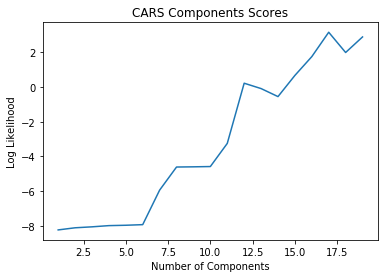

In [32]:
plt.title("CARS Components Scores")
plt.xlabel("Number of Components")
plt.ylabel("Log Likelihood")
plt.plot(range(1,20), lscore)

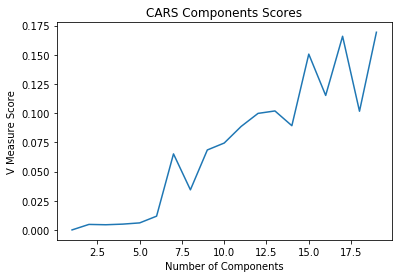

In [33]:
plt.title("CARS Components Scores")
plt.xlabel("Number of Components")
plt.ylabel("V Measure Score")
plt.plot(range(1,20), vscore)

In [35]:
lscore = []
ltotals= []
vscore = []
vtotals = []
for n_iter in (100,200,300):
    for i in range(1,25):
        em = GaussianMixture(n_components=i)
        em.fit(X)
        lscore.append(em.score(X))
        y_pred = em.predict(X)
        vscore.append(metrics.v_measure_score(y, y_pred))  
    ltotals.append(lscore)
    lscore = []
    vtotals.append(vscore)
    vtotoal = []

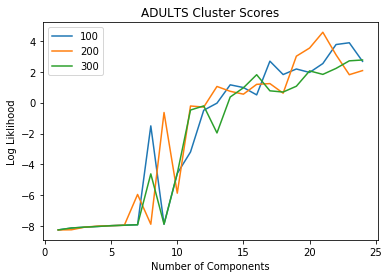

In [36]:
plt.title("ADULTS Cluster Scores")
plt.xlabel("Number of Components")
plt.ylabel("Log Liklihood")
plt.plot(range(1,25), ltotals[0], label="100")
plt.plot(range(1,25), ltotals[1], label="200")
plt.plot(range(1,25), ltotals[2], label="300")
plt.legend(loc='best')

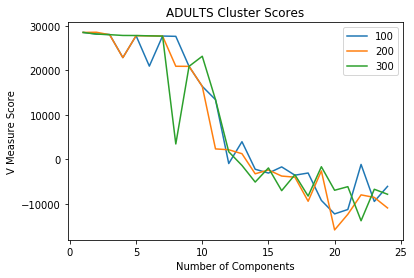

In [37]:
plt.title("ADULTS Cluster Scores")
plt.xlabel("Number of Components")
plt.ylabel("V Measure Score")
plt.plot(range(1,25), totals[0], label="100")
plt.plot(range(1,25), totals[1], label="200")
plt.plot(range(1,25), totals[2], label="300")
plt.legend(loc='best')